In [ ]:
import os
os.chdir('') # replace with the absolute path of qr-hint-code
print(os.getcwd())

from z3 import *
from bool_test import QueryTest
from query_info import *
from utils import *
import json
import matplotlib.pyplot as plt
import time
import numpy as np

# Testing Qr-Hint-Optimized

In [ ]:
fo_tests = ['tpc-h-test/num-pred-test/6.json', 'tpc-h-test/num-pred-test/7.json', 
         'tpc-h-test/num-pred-test/8.json', 'tpc-h-test/num-pred-test/9.json', 
         'tpc-h-test/num-pred-test/10.json', 'tpc-h-test/num-pred-test/11.json']

fo_best_cost = []
fo_cost, fo_time, fo_first_rs_time = [], [], []

fo_test_obj = []
fo_test_data = []

for i,t in enumerate(fo_tests):
    f = open(t)
    data = json.load(f)
    fo_best_cost.append(data['cost'])

    q1_info = QueryInfo(data['q1'])
    q2_info = QueryInfo(data['q2'])
    m = MappingInfo(q1_info, q2_info)
    t = QueryTest(q1_info, q2_info, m.z3_var_lookup, m.table_mappings[0], m.table_mappings_reverse[0])
    fo_test_obj.append(t)
    fo_test_data.append(data)
    
    print(f'================== Qr-Hint-Optimized {fo_test_data[i]["id"]}, iteration {i}, unique preds: {fo_test_data[i]["unique_preds"]} ===============')
    start = time.time()
    t.test_where_having_min_overall_fo()
    end = time.time()
    fo_time.append(end - start)
    fo_cost.append(t.fo_converge[1][0])
    fo_first_rs_time.append(round(t.fo_converge[2],2))

    

In [2]:
print('fo time:', fo_time)
print('fo cost:', fo_cost)
print('best costs:', fo_best_cost)
print('fo first rs time:', fo_first_rs_time)


fo time: [1.49, 2.55, 5.03, 11.57, 33.8, 160.15]
fo cost: [0.67, 0.58, 0.52, 0.48, 0.44, 0.42]
best costs: [0.67, 0.58, 0.52, 0.48, 0.44, 0.42]
fo first rs time: [0.3, 0.15, 0.27, 0.22, 0.61, 0.78]


# Testing Qr-Hint

In [ ]:
fg_tests = ['tpc-h-test/num-pred-test/6.json', 'tpc-h-test/num-pred-test/7.json', 
         'tpc-h-test/num-pred-test/8.json', 'tpc-h-test/num-pred-test/9.json', 
         'tpc-h-test/num-pred-test/10.json', 'tpc-h-test/num-pred-test/11.json',
         'tpc-h-test/num-pred-test/12.json', 'tpc-h-test/num-pred-test/13.json']

fg_best_cost = []
fg_cost, fg_time, fg_first_rs_time = [], [], []

fg_test_obj = []
fg_test_data = []

for i,t in enumerate(fg_tests):
    f = open(t)
    data = json.load(f)
    fg_best_cost.append(data['cost'])

    q1_info = QueryInfo(data['q1'])
    q2_info = QueryInfo(data['q2'])
    m = MappingInfo(q1_info, q2_info)
    t = QueryTest(q1_info, q2_info, m.z3_var_lookup, m.table_mappings[0], m.table_mappings_reverse[0])
    fg_test_obj.append(t)
    fg_test_data.append(data)
    
    print(f'================== Qr-Hint {fg_test_data[i]["id"]}, iteration {i}, unique preds: {fg_test_data[i]["unique_preds"]} ===============')
    start = time.time()
    t.test_where_having_min_overall_fg()
    end = time.time()
    fg_time.append(end - start)
    fg_cost.append(t.fg_converge[1][0])
    fg_first_rs_time.append(round(t.fg_converge[2],2))
    



In [3]:
print('fg time:', fg_time)
print('fg cost:', fg_cost)
print('best costs:', fg_best_cost)
print('fg first rs time:', fg_first_rs_time)

fg time: [0.57, 0.84, 1.42, 2.26, 4.21, 8.89, 28.5, 151.02]
fg cost: [0.67, 0.58, 0.52, 0.48, 0.44, 0.42, 0.39, 0.38]
best costs: [0.67, 0.58, 0.52, 0.48, 0.44, 0.42, 0.39, 0.375]
fg first rs time: [0.13, 0.15, 0.27, 0.23, 0.64, 0.83, 0.97, 0.9]


In [15]:
fg_time = [round(x, 2) for x in fg_time]
fo_time = [round(x, 2) for x in fo_time]

# Draw Line Plot to show runtime

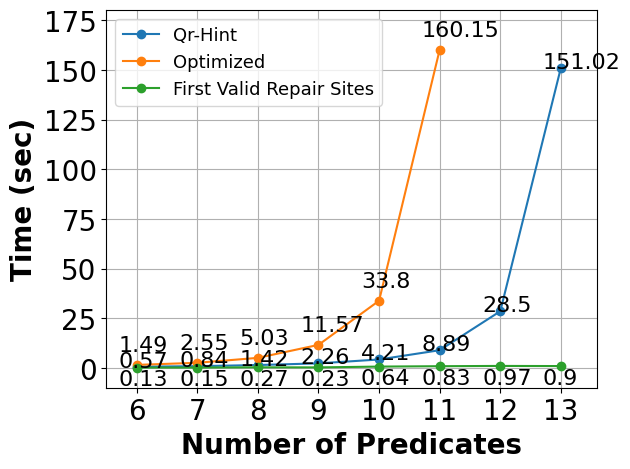

In [14]:


fo_num_preds = [6,7,8,9,10,11] # [data['unique_preds'] for data in fo_test_data]
fg_num_preds = [6,7,8,9,10,11,12,13] # [data['unique_preds'] for data in fg_test_data]

plt.plot(fg_num_preds, fg_time, label='Qr-Hint', marker='o')
plt.plot(fo_num_preds, fo_time, label='Optimized', marker='o')
plt.plot(fg_num_preds, fg_first_rs_time, label='First Valid Repair Sites', marker='o')
plt.xlabel('Number of Predicates', fontweight ='bold', fontsize = 20)
plt.ylabel('Time (sec)', fontweight ='bold', fontsize = 20)
# plt.xticks([r + barWidth/1 for r in range(len(ttg_cost))],
#         tpc_label, fontsize=20)
# plt.yticks(fontsize=20)
for i, xy in enumerate(zip(fg_num_preds, fg_first_rs_time)):
    plt.annotate('%s' % xy[1], xy=(xy[0]-0.3, xy[1] - 9), textcoords='data', fontsize=16)
for i, xy in enumerate(zip(fg_num_preds, fg_time)):
    plt.annotate('%s' % xy[1], xy=(xy[0]-0.3, xy[1]), textcoords='data', fontsize=16)
for i, xy in enumerate(zip(fo_num_preds, fo_time)):
    plt.annotate('%s' % xy[1], xy=(xy[0]-0.3, xy[1] + 7), textcoords='data', fontsize=16)
    
plt.xlim(5.5, 13.6)
plt.ylim(-10, 180)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
 
plt.legend(prop={'size': 13})
plt.grid()
plt.tight_layout()
plt.savefig('num_preds_time.png', dpi=300)
plt.show()

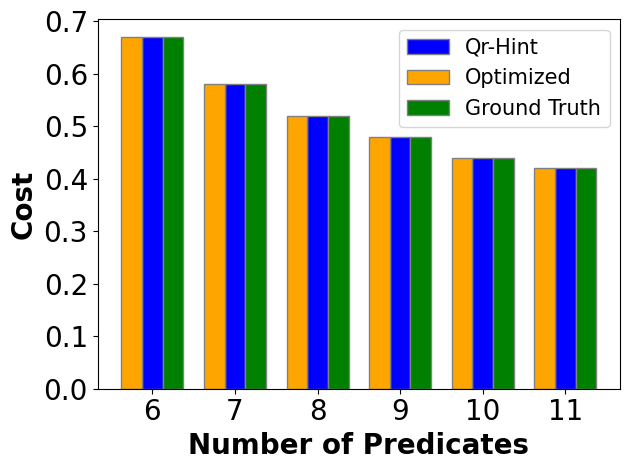

In [53]:
x_labels = [data['unique_preds'] for data in fo_test_data]

barWidth = 0.25
br1 = np.arange(len(fo_cost))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


plt.bar(br2, fg_cost[:-2], color ='blue', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint')
plt.bar(br1, fo_cost, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Optimized')
plt.bar(br3, fo_best_cost, color ='green', width = barWidth,
        edgecolor ='grey', label ='Ground Truth')



 
# Adding Xticks
plt.xlabel('Number of Predicates', fontweight ='bold', fontsize = 20)
plt.ylabel('Cost', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth/1 for r in range(len(fo_cost))],
        x_labels, fontsize=20)
plt.yticks(fontsize=20)
 
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.savefig('num_preds_cost.png')
plt.show()